In [1]:
from fastai.vision.all import *


In [2]:
path = untar_data(URLs.MNIST)

In [3]:
Path.BASE_PATH = path

In [4]:
path.ls()

(#2) [Path('testing'),Path('training')]

In [5]:
(path/'training').ls()

(#10) [Path('training/6'),Path('training/2'),Path('training/0'),Path('training/7'),Path('training/3'),Path('training/5'),Path('training/9'),Path('training/1'),Path('training/4'),Path('training/8')]

In [6]:
zeroes = (path/'training/0').ls().sorted()
ones = (path/'training/1').ls().sorted()
twos = (path/'training/2').ls().sorted()
threes = (path/'training/3').ls().sorted()
fours = (path/'training/4').ls().sorted()
fives = (path/'training/5').ls().sorted()
sixes = (path/'training/6').ls().sorted()
sevens = (path/'training/7').ls().sorted()
eights = (path/'training/8').ls().sorted()
nines = (path/'training/9').ls().sorted()


In [7]:
im1_path = ones[1]
im1 = Image.open(im1_path)
im1

In [8]:
zero_tensors = [tensor(Image.open(o)) for o in zeroes]
one_tensors = [tensor(Image.open(o)) for o in ones]
two_tensors = [tensor(Image.open(o)) for o in twos]
three_tensors = [tensor(Image.open(o)) for o in threes]
four_tensors = [tensor(Image.open(o)) for o in fours]
five_tensors = [tensor(Image.open(o)) for o in fives]
six_tensors = [tensor(Image.open(o)) for o in sixes]
seven_tensors = [tensor(Image.open(o)) for o in sevens]
eight_tensors = [tensor(Image.open(o)) for o in eights]
nine_tensors = [tensor(Image.open(o)) for o in nines]
len(zero_tensors)

5923

In [9]:
stacked_zeroes = torch.stack(zero_tensors).float()/255
stacked_ones = torch.stack(one_tensors).float()/255
stacked_twos = torch.stack(two_tensors).float()/255
stacked_threes = torch.stack(three_tensors).float()/255
stacked_fours = torch.stack(four_tensors).float()/255
stacked_fives = torch.stack(five_tensors).float()/255
stacked_sixes = torch.stack(six_tensors).float()/255
stacked_sevens = torch.stack(seven_tensors).float()/255
stacked_eights = torch.stack(eight_tensors).float()/255
stacked_nines = torch.stack(nine_tensors).float()/255
stacked_zeroes.shape

torch.Size([5923, 28, 28])

<Axes: >

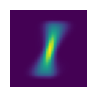

In [10]:
mean1 = stacked_ones.mean(0)
show_image(mean1)


<Axes: >

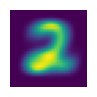

In [11]:
mean2 = stacked_twos.mean(0)
show_image(mean2)

In [12]:
mean0 = stacked_zeroes.mean(0)
mean1 = stacked_ones.mean(0)
mean2 = stacked_twos.mean(0)
mean3 = stacked_threes.mean(0)
mean4 = stacked_fours.mean(0)
mean5 = stacked_fives.mean(0)
mean6 = stacked_sixes.mean(0)
mean7 = stacked_sevens.mean(0)
mean8 = stacked_eights.mean(0)
mean9 = stacked_nines.mean(0)

In [13]:
def mean_distance(a,b):
  return F.mse_loss(a,b)


In [14]:
means = [mean0, mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9]
def predict(x):
  logits = [mean_distance(x, mean_dig) for mean_dig in means]

  return  np.argmin(logits)




In [15]:
valid = (path/'testing'/'1').ls()
valid_img = Image.open(valid[5])
predict(tensor(valid_img).float()/255.)



1

In [16]:
zero_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'0').ls().sorted()]
one_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'1').ls().sorted()]
two_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'2').ls().sorted()]
three_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'3').ls().sorted()]
four_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'4').ls().sorted()]
five_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'5').ls().sorted()]
six_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'6').ls().sorted()]
seven_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'7').ls().sorted()]
eight_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'8').ls().sorted()]
nine_tensors = [tensor(Image.open(o)) for o in (path/'testing'/'9').ls().sorted()]

valid_zeroes = torch.stack(zero_tensors).float()/255
valid_ones = torch.stack(one_tensors).float()/255
valid_twos = torch.stack(two_tensors).float()/255
valid_threes = torch.stack(three_tensors).float()/255
valid_fours = torch.stack(four_tensors).float()/255
valid_fives = torch.stack(five_tensors).float()/255
valid_sixes = torch.stack(six_tensors).float()/255
valid_sevens = torch.stack(seven_tensors).float()/255
valid_eights = torch.stack(eight_tensors).float()/255
valid_nines = torch.stack(nine_tensors).float()/255

In [17]:
total = 0
accuracies = []
for x in valid_zeroes:
    if(predict(x) == 0):
        total += 1
accuracies.append(total/valid_zeroes.shape[0])
accuracies

[0.8959183673469387]

In [18]:
total = 0
for x in valid_ones:
    if(predict(x) == 1):
        total += 1
accuracies.append(total/valid_ones.shape[0])

In [19]:
total = 0
for x in valid_twos:
    if(predict(x) == 2):
        total += 1
accuracies.append(total/valid_twos.shape[0])

In [20]:
total = 0
for x in valid_threes:
    if(predict(x) == 3):
        total += 1
accuracies.append(total/valid_threes.shape[0])

In [21]:
total = 0
for x in valid_fours:
    if(predict(x) == 4):
        total += 1
accuracies.append(total/valid_fours.shape[0])

In [22]:
total = 0
for x in valid_fives:
    if(predict(x) == 5):
        total += 1
accuracies.append(total/valid_fives.shape[0])

In [23]:
total = 0
for x in valid_sixes:
    if(predict(x) == 6):
        total += 1
accuracies.append(total/valid_sixes.shape[0])

In [24]:
total = 0
for x in valid_sevens:
    if(predict(x) == 7):
        total += 1
accuracies.append(total/valid_sevens.shape[0])

In [25]:
total = 0
for x in valid_eights:
    if(predict(x) == 8):
        total += 1
accuracies.append(total/valid_eights.shape[0])

In [26]:
total = 0
for x in valid_nines :
    if(predict(x) == 9):
        total += 1
accuracies.append(total/valid_nines.shape[0])

In [27]:
accuracies

[0.8959183673469387,
 0.9621145374449339,
 0.7567829457364341,
 0.805940594059406,
 0.8258655804480651,
 0.6860986547085202,
 0.8632567849686847,
 0.8326848249027238,
 0.7371663244353183,
 0.8067393458870169]

In [28]:
np.mean(accuracies)

0.8172567959938041

Better way to do it:



In [29]:
training_data = [(path/'training'/str(i)) for i in range(10)]
testing_data = [(path/'testing'/str(i)) for i in range(10)]
training_tensors = [torch.stack([tensor(Image.open(image)).float()/255 for image in x.ls()]) for x in training_data]
testing_tensors = [torch.stack([tensor(Image.open(image)).float()/255 for image in test.ls()]) for test in testing_data]


(<Axes: >, torch.Size([5923, 28, 28]))

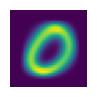

In [30]:

mean_tensors = [mean_train.mean(0) for mean_train in training_tensors]
show_image(mean_tensors[0]), training_tensors[0].shape

In [31]:
correct = []
total = []

for i in range(10):
  total.append(testing_tensors[i].shape[0])
  preds = torch.Tensor([torch.stack([
      F.mse_loss(testing_tensors[i][img],
                 mean_tensors[mean_index]).sqrt()
  for mean_index in range(10)
  ]).argmin() for img in range(testing_tensors[i].shape[0])])
  correct.append((preds==i).sum())

In [32]:
torch.Tensor(correct).sum()/torch.Tensor(total).sum()


tensor(0.8203)

Neural network

In [49]:
train_x = torch.cat([stacked_zeroes, stacked_ones, stacked_twos,
                     stacked_threes, stacked_fours, stacked_fives,
                     stacked_sixes, stacked_sevens, stacked_eights,
                     stacked_nines]).view(-1, 28*28)

train_y = tensor([0]*len(stacked_zeroes) + [1]*len(stacked_ones) +
                 [2]*len(stacked_twos) + [3]*len(stacked_threes) +
                 [4]*len(stacked_fours) + [5]*len(stacked_fives) +
                 [6]*len(stacked_sixes) + [7]*len(stacked_sevens) +
                 [8]*len(stacked_eights) + [9]*len(stacked_nines) ).unsqueeze(1)
train_x.shape, train_y.shape

(torch.Size([60000, 784]), torch.Size([60000, 1]))

In [50]:
dset = list(zip(train_x, train_y))


In [51]:
valid_x = torch.cat([valid_zeroes, valid_ones, valid_twos,
                     valid_threes, valid_fours, valid_fives,
                     valid_sixes, valid_sevens, valid_eights,
                     valid_nines]).view(-1, 28*28)
valid_y = tensor([0]*len(valid_zeroes) + [1]*len(valid_ones) +
                 [2]*len(valid_twos) + [3]*len(valid_threes) +
                 [4]*len(valid_fours) + [5]*len(valid_fives) +
                 [6]*len(valid_sixes) + [7]*len(valid_sevens) +
                 [8]*len(valid_eights) + [9]*len(valid_nines) ).unsqueeze(1)
valid_x.shape, valid_y.shape

(torch.Size([10000, 784]), torch.Size([10000, 1]))

In [52]:
valid_dset = list(zip(valid_x, valid_y))
len(valid_dset), len(dset)

(10000, 60000)

In [84]:
def init_params(size, std=1.0):
  return (torch.randn(size)*std).requires_grad_()

weights = init_params(size = (28*28, 10))
bias = init_params(size = 10)

(train_x[0]*weights.T).sum() + bias

tensor([ 0.1545, -0.9260, -1.0256, -0.8948, -1.3884,  0.3242,  0.8626, -1.0027,
        -0.6166, -1.0393], grad_fn=<AddBackward0>)

In [85]:
def linear1(xb):
  return xb@weights + bias
preds = linear1(train_x)
preds.shape, preds

(torch.Size([60000, 10]),
 tensor([[  7.9728, -14.2406,  -1.3174,  ...,   1.0865,   1.9569,  -9.1556],
         [ -4.3740,  -9.7844,   1.7857,  ...,   7.4993,  15.1996, -20.7370],
         [  3.8289, -21.4584,  -3.2286,  ..., -11.0874,  24.5339, -15.2848],
         ...,
         [ -6.7458,   0.7334,   1.1740,  ...,   8.7413,  12.6390, -16.2587],
         [-16.0056, -10.6025,   3.6010,  ...,  -2.3621,   3.5342,   0.2438],
         [ -2.9393,  -3.0038,  -0.3647,  ...,   7.9783,  16.6659, -14.0023]],
        grad_fn=<AddBackward0>))

In [86]:
corrects = torch.argmax(linear1(train_x), dim = 1) == train_y.reshape(1, -1)

corrects.float().mean().item()
#corrects, linear1(train_x[:6]), train_y[:6].reshape(1, -1), torch.argmax(linear1(train_x[:6]), dim=1)

#corrects = torch.argmax(linear1(train_x)) == train_y
#torch.max(corrects.float())


0.10429999977350235

In [87]:

def softmax(x):
  exps = torch.exp(x - torch.max(x,dim=1, keepdim=True).values)

  return exps/torch.sum(exps, dim=1).reshape(-1, 1)

a = linear1(train_x[:2])
b = softmax(a)
c = torch.nn.functional.softmax(a)
a, b, c

<ipython-input-87-d5799f5ce5b8>:8: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  c = torch.nn.functional.softmax(a)


(tensor([[  7.9728, -14.2406,  -1.3174,   3.6908,   6.4918,   4.2579,  -1.6500,
            1.0865,   1.9569,  -9.1556],
         [ -4.3740,  -9.7844,   1.7857,  -1.7142,   4.6666,  -4.8711,   6.1158,
            7.4993,  15.1996, -20.7370]], grad_fn=<AddBackward0>),
 tensor([[7.8790e-01, 1.7753e-10, 7.2742e-05, 1.0884e-02, 1.7917e-01, 1.9190e-02,
          5.2157e-05, 8.0500e-04, 1.9222e-03, 2.8688e-08],
         [3.1552e-09, 1.4104e-11, 1.4934e-06, 4.5099e-08, 2.6626e-05, 1.9193e-09,
          1.1342e-04, 4.5243e-04, 9.9941e-01, 2.4699e-16]],
        grad_fn=<DivBackward0>),
 tensor([[7.8790e-01, 1.7753e-10, 7.2742e-05, 1.0884e-02, 1.7917e-01, 1.9190e-02,
          5.2157e-05, 8.0500e-04, 1.9222e-03, 2.8688e-08],
         [3.1552e-09, 1.4104e-11, 1.4934e-06, 4.5099e-08, 2.6626e-05, 1.9193e-09,
          1.1342e-04, 4.5243e-04, 9.9941e-01, 2.4699e-16]],
        grad_fn=<SoftmaxBackward0>))

In [88]:
def mnist_loss(predictions, targets):
  predictions = softmax(predictions)
  with torch.no_grad():
    trg = torch.zeros((targets.shape[0], 10))
    trg[np.arange(targets.shape[0]), targets] = 1
    num_samples = predictions.shape[0]
  loss = -torch.sum(trg * torch.log(predictions)) / num_samples
  return loss

trgts  = train_y[:3].squeeze()
prds   = linear1(train_x[:3])

trgts.shape, prds.shape, torch.nn.functional.cross_entropy(prds, trgts),  mnist_loss(prds, trgts)

(torch.Size([3]),
 torch.Size([3, 10]),
 tensor(13.5066, grad_fn=<NllLossBackward0>),
 tensor(13.5066, grad_fn=<DivBackward0>))

In [89]:
dl = DataLoader(dset, batch_size = 256)
valid_dl = DataLoader(valid_dset, batch_size = 256)


def calc_grad(xb, yb, model):
  preds = model(xb)

  #loss = torch.nn.functional.cross_entropy(preds, yb.squeeze())
  loss = mnist_loss(preds, yb.squeeze())
  loss.backward()

def train_epoch(model, lr, params):
  for xb, yb in dl:
    calc_grad(xb, yb, model)
    for p in params:
      #print(p)
      p.data -= p.grad.data*lr
      p.grad.zero_()

def batch_accuracy(xb, yb):
    predictions = softmax(xb)
    predicted_labels = torch.argmax(predictions, axis=1)
    accuracy = torch.mean((predicted_labels == yb).float())
    return accuracy

def validate_epoch(model):
    accs = [batch_accuracy(model(xb), yb) for xb,yb in valid_dl]
    return round(torch.stack(accs).mean().item(), 4)

validate_epoch(linear1)

0.1036

In [91]:
lr = 0.1
dl = DataLoader(dset, batch_size = 256)
valid_dl = DataLoader(valid_dset, batch_size = 256)
weights = init_params((28*28, 10))
bias = init_params(10)
params = weights,bias

for i in range(20):
    train_epoch(linear1, lr, params)
    print(validate_epoch(linear1), end=' ')

0.1524 0.2337 0.3171 0.3819 0.4308 0.4684 0.495 0.5208 0.5421 0.5564 0.5693 0.5809 0.5894 0.5983 0.6059 0.6126 0.6189 0.6235 0.6284 0.6328 

Torch Classes

In [92]:
linear_model = nn.Linear(28*28,10)

w,b = linear_model.parameters()
w.shape,b.shape

(torch.Size([10, 784]), torch.Size([10]))

In [94]:
class BasicOptim:
    def __init__(self,params,lr): self.params,self.lr = list(params),lr

    def step(self, *args, **kwargs):
        for p in self.params: p.data -= p.grad.data * self.lr

    def zero_grad(self, *args, **kwargs):
        for p in self.params: p.grad = None

In [95]:
opt = BasicOptim(linear_model.parameters(), lr)

In [96]:
def train_epoch(model):
    for xb,yb in dl:
        calc_grad(xb, yb, model)
        opt.step()
        opt.zero_grad()

def train_model(model, epochs):
    for i in range(epochs):
        train_epoch(model)
        print(validate_epoch(model), end=' ')

train_model(linear_model, 20)

0.122 0.2126 0.3289 0.3906 0.4277 0.4535 0.4766 0.4923 0.5044 0.5159 0.5268 0.536 0.545 0.5522 0.5587 0.5659 0.5697 0.5744 0.5785 0.5826 

In [98]:
dset = list(zip(train_x, train_y.squeeze()))
valid_dset = list(zip(valid_x, valid_y.squeeze()))
dl = DataLoader(dset, batch_size = 256)
valid_dl = DataLoader(valid_dset, batch_size = 256)

dls = DataLoaders(dl, valid_dl)

In [ ]:
simple_net = nn.Sequential(
    nn.Linear(28*28,100),
    nn.ReLU(),
    nn.Linear(100,10)
    )

learn = Learner(dls, simple_net, opt_func=SGD,
                loss_func=mnist_loss, metrics=batch_accuracy)
learn.fit(40, 0.001)

epoch,train_loss,valid_loss,batch_accuracy,time
0,2.355434,2.272595,0.159200,00:06
1,2.313013,2.232932,0.287300,00:03
2,2.272081,2.191395,0.423500,00:03
3,2.231214,2.146130,0.522000,00:02
4,2.188625,2.095912,0.590000,00:01
5,2.143122,2.040202,0.628000,00:01
6,2.093689,1.979013,0.655400,00:01
7,2.039764,1.912635,0.670900,00:01
8,1.981137,1.841715,0.680500,00:01
9,1.918530,1.767381,0.690700,00:01


In [ ]:
dls = ImageDataLoaders.from_folder(path, train='training', valid='testing')
learn = vision_learner(dls, resnet18, n_out = 10,
                   loss_func=F.cross_entropy, metrics=batch_accuracy,
                   pretrained=False)
learn.fit_one_cycle(1, 0.1)